## Ejercicio 1
Trataremos de obtener los bordes del objeto de la imagen I. Para ello primero
probamos con:

a) Método básico:
1.Suavizado Gaussiano
2.Operador Sobel (módulo del gradiente)
3.Umbralización

b) Método de Canny
Compara los resultados y saca tus propias conclusiones. Experimenta con los distintos
parámetros implicados (explicando qué significa cada uno).

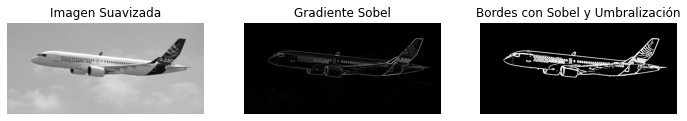

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
img = cv2.imread('imagen.jpg', cv2.IMREAD_GRAYSCALE)

# 1. Suavizado Gaussiano (reduce el ruido y suaviza la imagen)
img_blurred = cv2.GaussianBlur(img, (5, 5), 0)  # Tamaño de la máscara 5x5

# 2. Operador Sobel (calculamos los gradientes en las direcciones X e Y utilizando cv2.Sobel())
sobel_x = cv2.Sobel(img_blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_blurred, cv2.CV_64F, 0, 1, ksize=3)

# Calcular el módulo del gradiente (se utiliza cv2.threshold() para convertir las imágenes de 
# gradientes en una imagen binaria)
sobel_grad = cv2.magnitude(sobel_x, sobel_y)

# 3. Umbralización
_, sobel_edges = cv2.threshold(sobel_grad, 50, 255, cv2.THRESH_BINARY)

# Mostrar los resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_blurred, cmap='gray')
plt.title('Imagen Suavizada')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_grad, cmap='gray')
plt.title('Gradiente Sobel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Bordes con Sobel y Umbralización')
plt.axis('off')

plt.show()


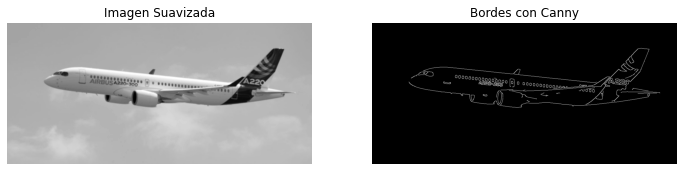

In [13]:
# 1. Suavizado Gaussiano (filtro gaussiano)
img_blurred_canny = cv2.GaussianBlur(img, (5, 5), 0)

# 2. Detección de bordes con el método de Canny (gradientes de intensidad de dirección X e Y)
edges_canny = cv2.Canny(img_blurred_canny, 100, 210)  # Umbral bajo = 100, alto = 210

# Mostrar los resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_blurred, cmap='gray')
plt.title('Imagen Suavizada')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges_canny, cmap='gray')
plt.title('Bordes con Canny')
plt.axis('off')

plt.show()


## Ejercicio 2

Trataremos de segmentar el objeto de la imagen I (antes del ejercicio 1) mediante
umbralización.

a) Visualiza el histograma de la imagen y razona si se puede deducir un umbral
apropiado para segmentar el objeto del fondo.

b) Usa la umbralización de Otsu y comenta el resultado. ¿Obtiene mejor
resultado?

c) ¿Mejoran los resultados con un suavizado gaussiano previo?

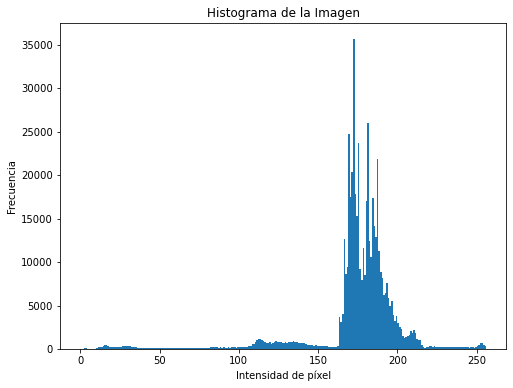

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
img = cv2.imread('imagen.jpg', cv2.IMREAD_GRAYSCALE)

# Visualizar el histograma de la imagen
plt.figure(figsize=(8, 6))
plt.hist(img.ravel(), bins=256, range=[0, 256])
plt.title('Histograma de la Imagen')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.show()

# El umbral adecuado viene dado por los picos de intensidad del histograma, en este caso, con un umbral inferior un umbral maimo

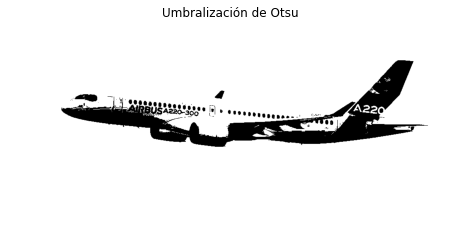

In [14]:
# Aplicar umbralización de Otsu
ret, img_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen umbralizada con Otsu
plt.figure(figsize=(8, 6))
plt.imshow(img_otsu, cmap='gray')
plt.title('Umbralización de Otsu')
plt.axis('off')
plt.show()

# Otsu calcula automáticamente el umbral óptimo basado en el histograma. Si la imagen tiene un fondo claro 
# y un objeto oscuro, Otsu generalmente proporciona buenos resultados.
# Si el fondo y el objeto están bien separados en el histograma y la imagen tiene un buen contraste,
# Otsu debería ser capaz de segmentar el objeto del fondo de manera eficiente.

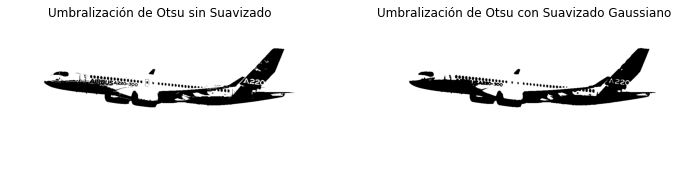

In [15]:
# Aplicar suavizado Gaussiano
img_blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Aplicar umbralización de Otsu después del suavizado
ret, img_otsu_blurred = cv2.threshold(img_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar los resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_otsu, cmap='gray')
plt.title('Umbralización de Otsu sin Suavizado')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_otsu_blurred, cmap='gray')
plt.title('Umbralización de Otsu con Suavizado Gaussiano')
plt.axis('off')

plt.show()

# Sin suavizado: Los bordes pueden estar más irregulares y el ruido puede ser más visible, 
# lo que puede afectar la precisión de la segmentación.
# Con suavizado: El suavizado reduce el ruido y hace que los bordes sean más definidos y continuos, 
# lo que mejora la segmentación y facilita la detección del umbral.

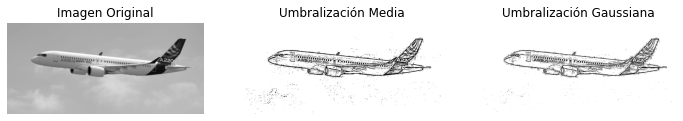

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
img = cv2.imread('imagen.jpg', cv2.IMREAD_GRAYSCALE)

# Umbralización adaptativa con la técnica Mean
img_mean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                 cv2.THRESH_BINARY, 7, 2)

# Umbralización adaptativa con la técnica Gaussiana
img_gaussian = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                     cv2.THRESH_BINARY, 7, 2)

# Penúltimo valor --> Tamaño de vecindad del pixel

# Mostrar los resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_mean, cmap='gray')
plt.title('Umbralización Media')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_gaussian, cmap='gray')
plt.title('Umbralización Gaussiana')
plt.axis('off')

plt.show()


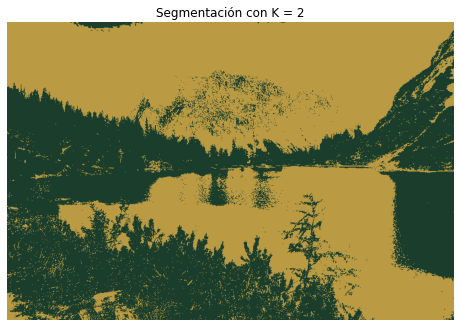

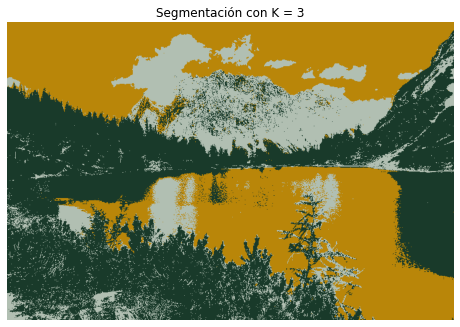

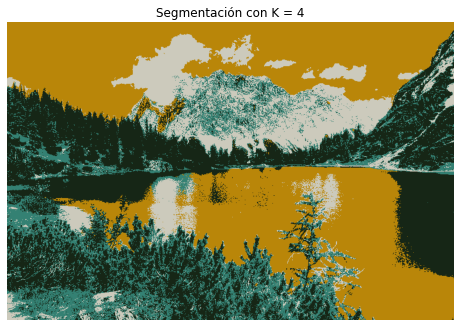

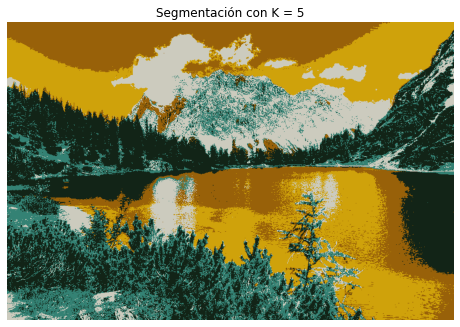

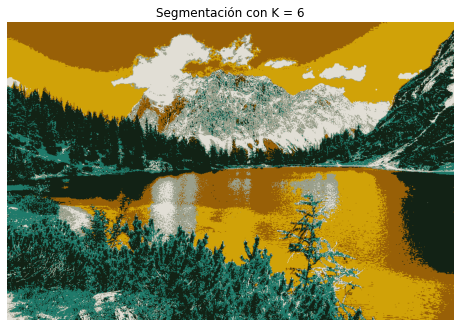

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
img = cv2.imread('imagen_2.jpg')

# Convertir la imagen a formato de datos que K-means pueda procesar
img_data = img.reshape((-1, 3))  # Convertir la imagen en una lista de píxeles

# Convertir a flotante
img_data = np.float32(img_data)

# Definir criterios de finalización: (tipo, número de iteraciones, precisión)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Probar con diferentes valores de K (número de clusters)
K_values = [2, 3, 4, 5, 6]
results = []

for K in K_values:
    # Aplicar K-means
    ret, label, center = cv2.kmeans(img_data, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convertir los centros de los clusters a 8 bits
    center = np.uint8(center)
    
    # Convertir las etiquetas a colores
    segmented_img = center[label.flatten()]
    segmented_img = segmented_img.reshape(img.shape)
    
    results.append(segmented_img)
    
    # Mostrar la imagen segmentada
    plt.figure(figsize=(8, 6))
    plt.imshow(segmented_img)
    plt.title(f'Segmentación con K = {K}')
    plt.axis('off')
    plt.show()



El número óptimo de K es aquel que da una segmentación clara, donde los objetos 
están correctamente agrupados sin demasiados segmentos innecesarios.